In [1]:
pip install pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Drop irrelevant columns
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# Convert 'Sex' to numerical
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Handle missing values in 'Age' and 'Fare'
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Fare'] = titanic_data['Fare'].fillna(titanic_data['Fare'].median())

# Split features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[90 15]
 [21 53]]


In [5]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(titanic_data.head())

First few rows of the DataFrame:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    0  22.0      1      0   7.2500
1         1       1    1  38.0      1      0  71.2833
2         1       3    1  26.0      0      0   7.9250
3         1       1    1  35.0      1      0  53.1000
4         0       3    0  35.0      0      0   8.0500


In [6]:
# Display descriptive statistics of numerical columns
print("\nDescriptive statistics of numerical columns:")
print(titanic_data.describe())


Descriptive statistics of numerical columns:
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.352413   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare  
count  891.000000  
mean    32.204208  
std     49.693429  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max    512.329200  


In [7]:
# Display descriptive statistics of all columns, including categorical ones
print("\nDescriptive statistics of all columns:")
print(titanic_data.describe(include='all'))


Descriptive statistics of all columns:
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.352413   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare  
count  891.000000  
mean    32.204208  
std     49.693429  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max    512.329200  


In [9]:
# Display information about the DataFrame
print("\nInformation about the DataFrame:\n")
print(titanic_data.info())


Information about the DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
None


In [10]:
# Missing values
# Display the count of missing values for each column
print("\nCount of missing values for each column:")
print(titanic_data.isnull().sum())


Count of missing values for each column:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


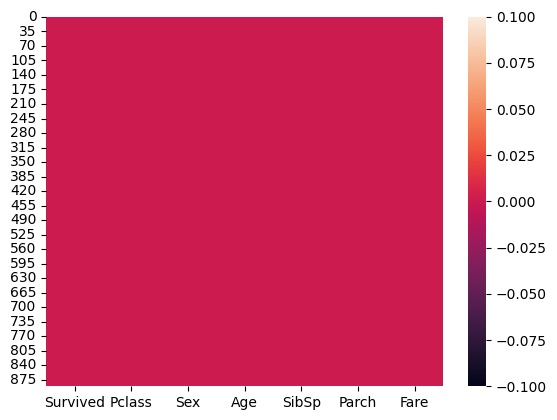

In [47]:
# Various methods to show where data is missing
sns.heatmap(titanic_data.isnull())

In [11]:
# Calculate the percentage of missing values for each column
print("\nPercentage of missing values for each column:")
print(titanic_data.isnull().sum() / len(titanic_data) * 100)


Percentage of missing values for each column:
Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
dtype: float64


In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


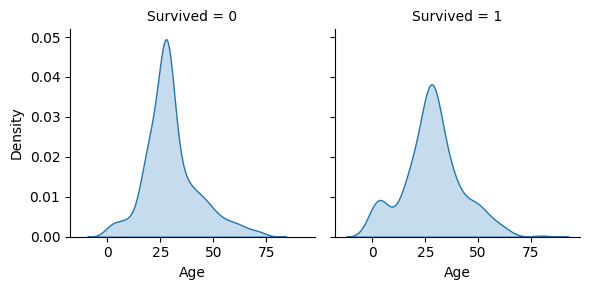

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization using FacetGrid to display kernel density plots
g = sns.FacetGrid(titanic_data, col='Survived')
g.map(sns.kdeplot, 'Age', fill=True)
plt.show()

In [14]:
# Calculate the average age in each category
avg_age_by_class = titanic_data.groupby('Pclass')['Age'].mean()
print("Average age in each class:")
print(avg_age_by_class)

Average age in each class:
Pclass
1    36.812130
2    29.765380
3    25.932627
Name: Age, dtype: float64


In [15]:
# Finding the Null value in data
print("Null values in the dataset:")
print(titanic_data.isnull().sum())

# Taking out the empty spaces from the Titanic dataset
titanic_data.dropna(inplace=True)

# Splitting Independent and Dependent Variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

Null values in the dataset:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


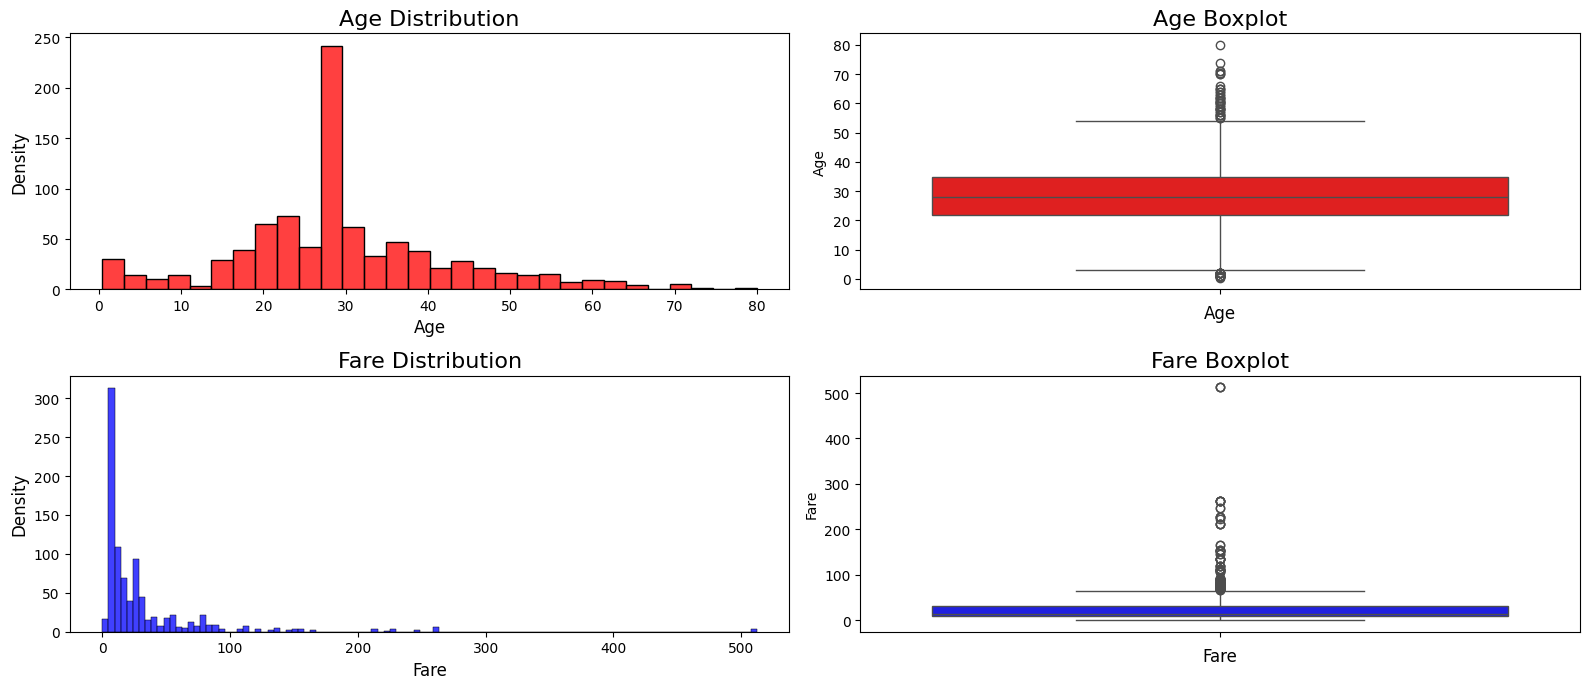

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 7))

# Plotting the Age distribution with a red color scheme
plt.subplot(2, 2, 1)
sns.histplot(titanic_data['Age'], color='red')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.subplot(2, 2, 2)
sns.boxplot(titanic_data['Age'], color='red')
plt.title('Age Boxplot', fontsize=16)
plt.xlabel('Age', fontsize=12)

# Plotting the Fare distribution with a green color scheme
plt.subplot(2, 2, 3)
sns.histplot(titanic_data['Fare'], color='blue')
plt.title('Fare Distribution', fontsize=16)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.subplot(2, 2, 4)
sns.boxplot(titanic_data['Fare'], color='blue')
plt.title('Fare Boxplot', fontsize=16)
plt.xlabel('Fare', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_7708\3723928019.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=titanic_data, palette=colors, legend=False)


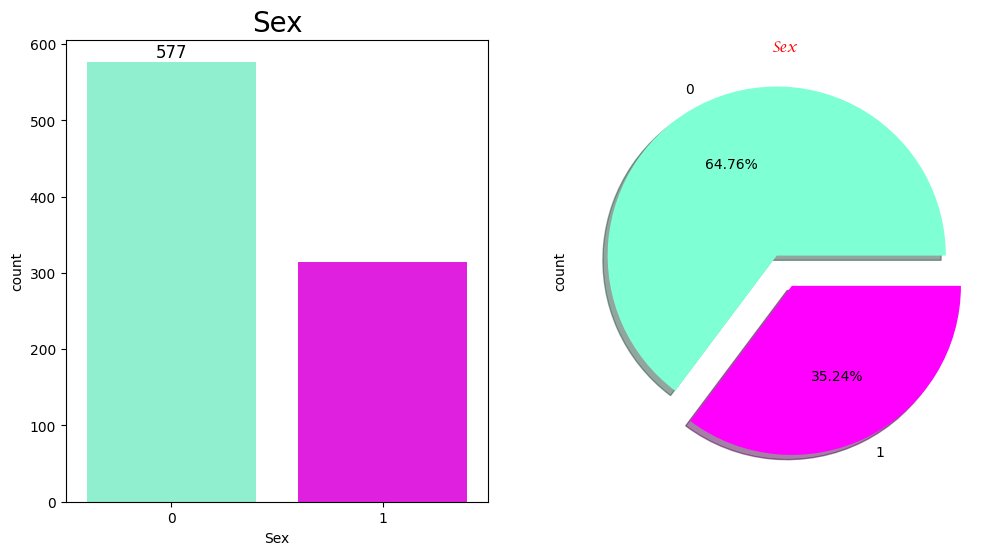

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
colors = ["Aquamarine", "Magenta"]

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Subplot 1 - Countplot
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=titanic_data, palette=colors, legend=False)
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")  # Add labels to the bars
plt.title("Sex", fontsize=20)

# Subplot 2 - Pie chart
ax2 = plt.subplot(1, 2, 2)
titanic_data['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, colors=colors, ax=ax2)
ax2.set_title(label="Sex", fontsize=20, color='Red', font='Lucida Calligraphy')

# Show the plot
plt.show()

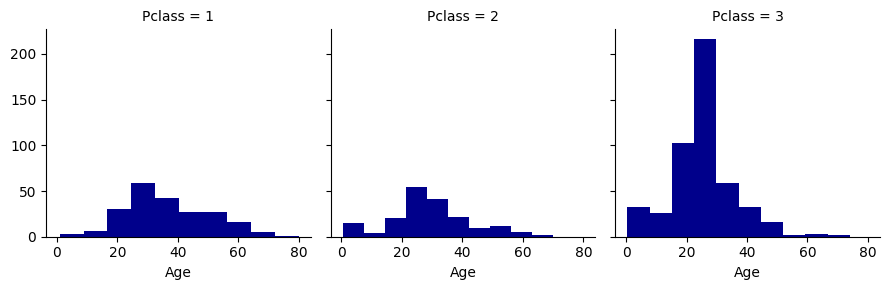

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the grape color
grape_color = "#00008B"

# Create a FacetGrid
g = sns.FacetGrid(titanic_data, col="Pclass")

# Map the histograms with the specified color
g = g.map(plt.hist, "Age", color=grape_color)

# Show the plot
plt.show()

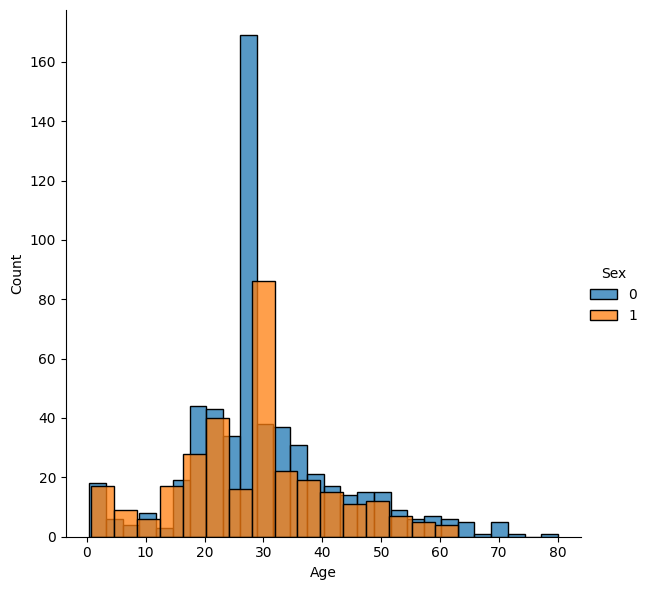

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(titanic_data, hue='Sex', height=6).map(sns.histplot, 'Age').add_legend()
plt.show()

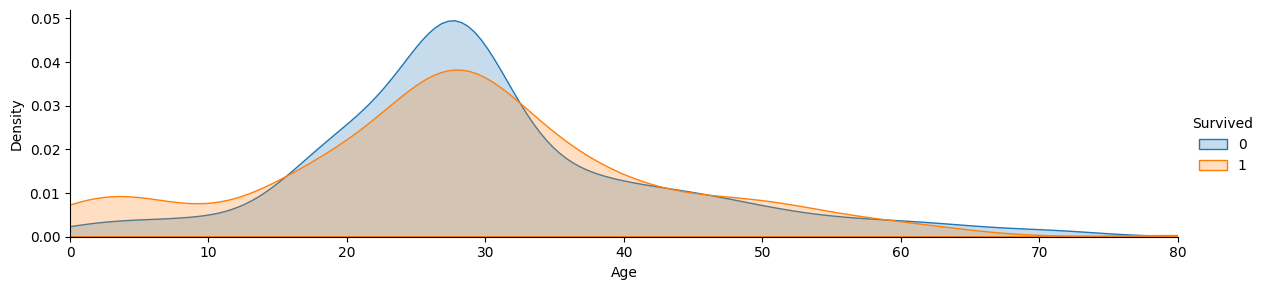

In [36]:
fig = sns.FacetGrid(titanic_data, hue="Survived", aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = titanic_data['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

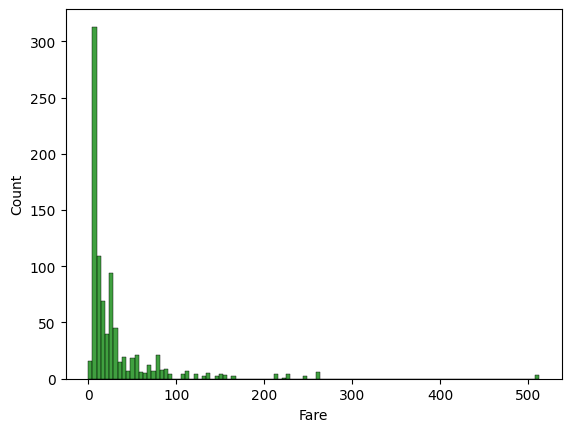

In [37]:
sns.histplot(titanic_data['Fare'],color="g")
plt.show()

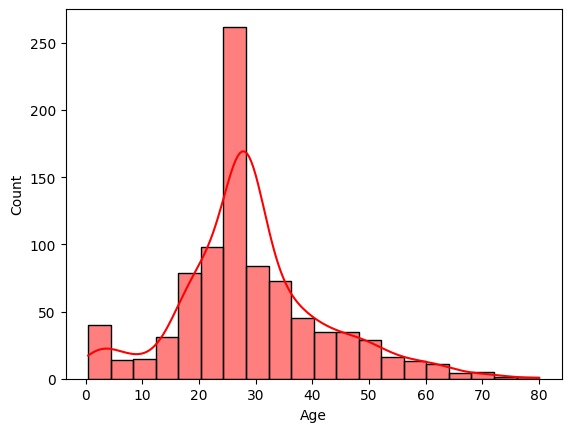

In [39]:
sns.histplot(titanic_data['Age'],color="r",bins=20,kde=True,)
plt.show()

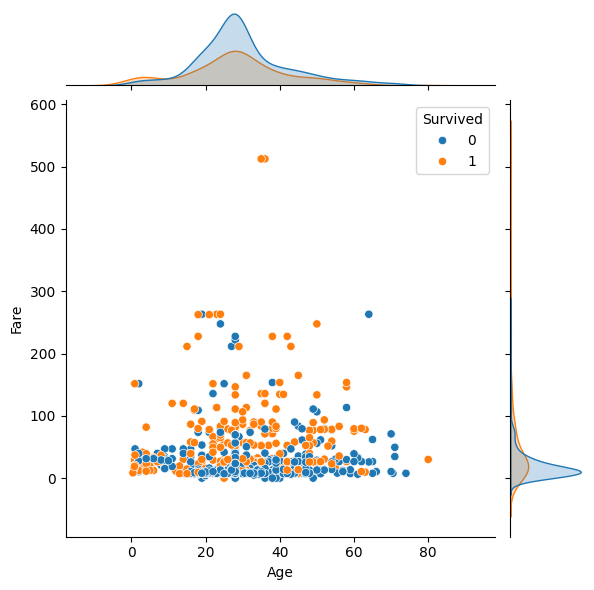

In [40]:
sns.jointplot(x="Age",y="Fare",data=titanic_data,color="Magenta",hue="Survived")
plt.show()

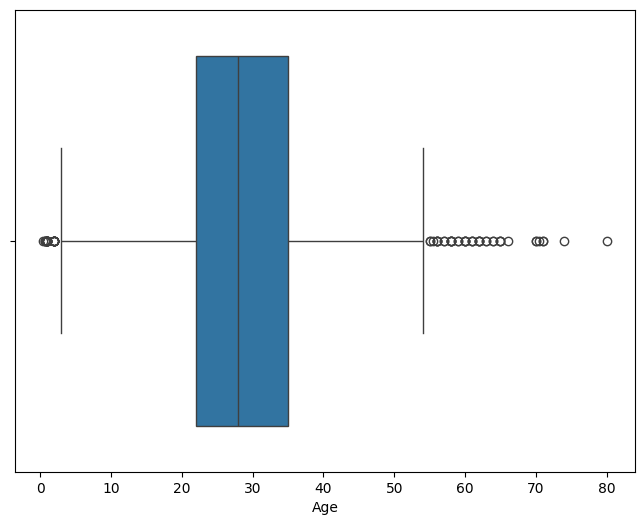

In [41]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=titanic_data["Age"])
plt.show()

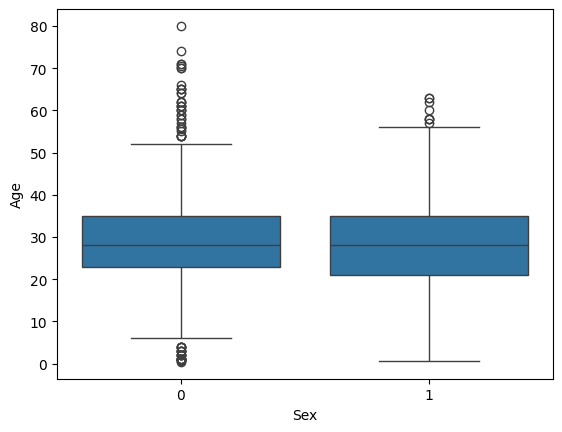

In [42]:
sns.boxplot(x='Sex', y = 'Age',data= titanic_data)
plt.show()

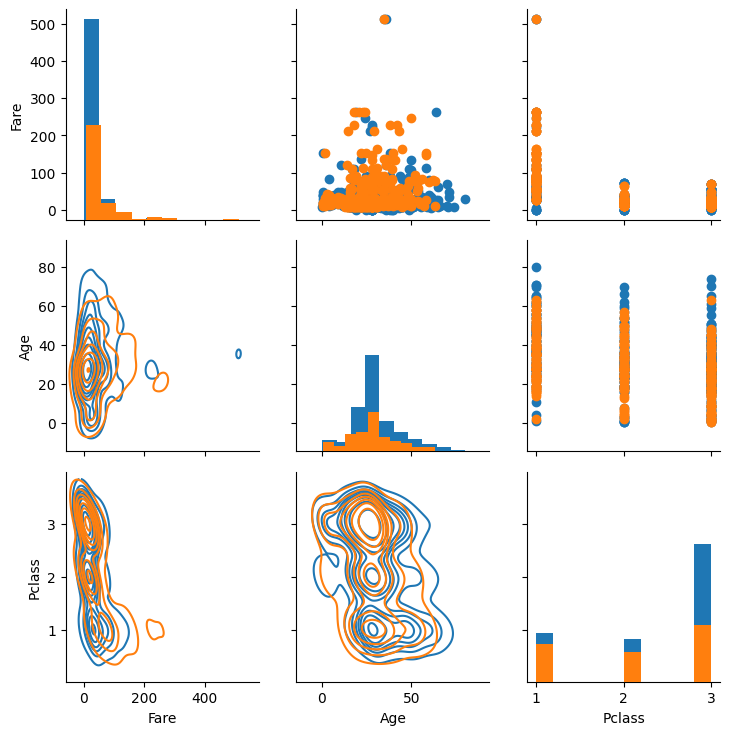

In [45]:
titanic_g = sns.PairGrid(titanic_data,hue='Sex',vars=['Fare','Age','Pclass'])
titanic_g.map_diag(plt.hist)
titanic_g.map_upper(plt.scatter)
titanic_g.map_lower(sns.kdeplot)
plt.show()

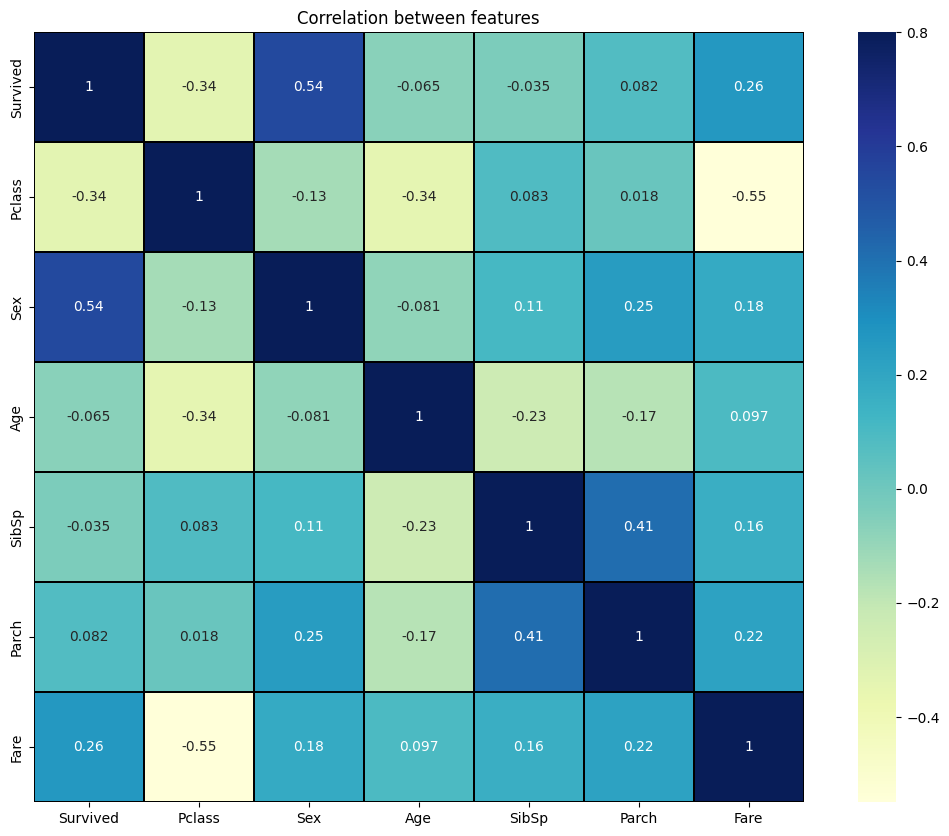

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the Titanic dataset into the 'titanic' DataFrame

# Drop non-numeric columns or select only numeric columns
numeric_columns = titanic_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu', linecolor="black")
plt.title('Correlation between features')
plt.show()

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)
y_pred_LDA = LDA.predict(X_test)

print("Training set score: {:.2f}".format(LDA.score(X_train, y_train)))
print("Test set score: {:.2f}".format(LDA.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_LDA)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_LDA))
print("Classification_Report: \n",classification_report(y_test,y_pred_LDA))

Training set score: 0.80
Test set score: 0.78
Accuracy Score: 0.78
Confusion Matrix: 
 [[89 16]
 [23 51]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [49]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)
y_pred_QDA = QDA.predict(X_test)

print("Training set score: {:.2f}".format(QDA.score(X_train, y_train)))
print("Test set score: {:.2f}".format(QDA.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_QDA)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_QDA))
print("Classification_Report: \n",classification_report(y_test,y_pred_QDA))

Training set score: 0.80
Test set score: 0.81
Accuracy Score: 0.81
Confusion Matrix: 
 [[92 13]
 [21 53]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [51]:
# Splitting train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

In [52]:
X_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare
241,3,1,28.0,1,0,15.5000
734,2,0,23.0,0,0,13.0000
581,1,1,39.0,1,1,110.8833
456,1,0,65.0,0,0,26.5500
118,1,0,24.0,0,1,247.5208
621,1,0,42.0,1,0,52.5542
162,3,0,26.0,0,0,7.7750
46,3,0,28.0,1,0,15.5000
709,3,0,28.0,1,1,15.2458
647,1,0,56.0,0,0,35.5000


In [54]:
y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [55]:
# Logestic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)),'\n')
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Training set score: 0.80 

Test set score: 0.81 

Accuracy Score: 0.81 

Confusion Matrix: 
 [[142  19]
 [ 32  75]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       161
           1       0.80      0.70      0.75       107

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [57]:
# Random Forest Classifier (criterion = 'entropy')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

print("Training set score: {:.2f}".format(rf_ent.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf_ent.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_rfe)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rfe))
print("Classification_Report: \n",classification_report(y_test,y_pred_rfe))

Training set score: 0.99
Test set score: 0.82
Accuracy Score: 0.82
Confusion Matrix: 
 [[138  23]
 [ 26  81]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       161
           1       0.78      0.76      0.77       107

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [58]:
# Naive Bayes GaussianNB Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Gnb = GaussianNB()
Gnb.fit(X_train,y_train)
y_pred_Gnb = Gnb.predict(X_test)

print("Training set score: {:.2f}".format(Gnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Gnb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_Gnb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Gnb))
print("Classification_Report: \n",classification_report(y_test,y_pred_Gnb))

Training set score: 0.79
Test set score: 0.83
Accuracy Score: 0.83
Confusion Matrix: 
 [[142  19]
 [ 27  80]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       161
           1       0.81      0.75      0.78       107

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



In [66]:
# Naive Bayes BernoulliNB ClassifierNaive Bayes BernoulliNB Classifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Bnb = BernoulliNB()
Bnb.fit(X_train,y_train)
y_pred_Bnb = Bnb.predict(X_test)

print("Training set score: {:.2f}".format(Bnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Bnb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_Bnb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Bnb))
print("Classification_Report: \n",classification_report(y_test,y_pred_Bnb))

Training set score: 0.79
Test set score: 0.79
Accuracy Score: 0.79
Confusion Matrix: 
 [[136  25]
 [ 32  75]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       161
           1       0.75      0.70      0.72       107

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [60]:
# Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

print("Training set score: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_mlp)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_mlp))
print("Classification_Report: \n",classification_report(y_test,y_pred_mlp))

Training set score: 0.80
Test set score: 0.80
Accuracy Score: 0.80
Confusion Matrix: 
 [[133  28]
 [ 25  82]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       161
           1       0.75      0.77      0.76       107

    accuracy                           0.80       268
   macro avg       0.79      0.80      0.79       268
weighted avg       0.80      0.80      0.80       268



In [61]:
# K nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_knn)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_knn))
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Training set score: 0.76
Test set score: 0.72
Accuracy Score: 0.72
Confusion Matrix: 
 [[136  25]
 [ 49  58]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.74      0.84      0.79       161
           1       0.70      0.54      0.61       107

    accuracy                           0.72       268
   macro avg       0.72      0.69      0.70       268
weighted avg       0.72      0.72      0.72       268



In [64]:
# Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

print("Training set score: {:.2f}".format(et_100.score(X_train, y_train)))
print("Test set score: {:.2f}".format(et_100.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_et_100)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_et_100))
print("Classification_Report: \n",classification_report(y_test,y_pred_et_100))

Training set score: 0.99
Test set score: 0.78
Accuracy Score: 0.78
Confusion Matrix: 
 [[131  30]
 [ 29  78]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       161
           1       0.72      0.73      0.73       107

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [63]:
# Support Vector Classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_linear = SVC(kernel='linear',gamma='auto',probability=True)
svc_linear.fit(X_train,y_train)
y_pred_svc_linear = svc_linear.predict(X_test)

print("Training set score: {:.2f}".format(svc_linear.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svc_linear.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_svc_linear)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_svc_linear))
print("Classification_Report: \n",classification_report(y_test,y_pred_svc_linear))

Training set score: 0.79
Test set score: 0.79
Accuracy Score: 0.79
Confusion Matrix: 
 [[136  25]
 [ 32  75]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       161
           1       0.75      0.70      0.72       107

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [65]:
# Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

print("Training set score: {:.2f}".format(sgd.score(X_train, y_train)))
print("Test set score: {:.2f}".format(sgd.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_sgd)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_sgd))
print("Classification_Report: \n",classification_report(y_test,y_pred_sgd))

Training set score: 0.44
Test set score: 0.44
Accuracy Score: 0.44
Confusion Matrix: 
 [[ 13 148]
 [  1 106]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.93      0.08      0.15       161
           1       0.42      0.99      0.59       107

    accuracy                           0.44       268
   macro avg       0.67      0.54      0.37       268
weighted avg       0.72      0.44      0.32       268



In [67]:
# Adaboost Classifie

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

print("Training set score: {:.2f}".format(ada.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ada.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_ada)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_ada))
print("Classification_Report: \n",classification_report(y_test,y_pred_ada))

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training set score: 0.84
Test set score: 0.81
Accuracy Score: 0.81
Confusion Matrix: 
 [[135  26]
 [ 25  82]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       161
           1       0.76      0.77      0.76       107

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [68]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

print("Training set score: {:.2f}".format(decc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(decc.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_decc)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_decc))
print("Classification_Report: \n",classification_report(y_test,y_pred_decc))

Training set score: 0.99
Test set score: 0.78
Accuracy Score: 0.78
Confusion Matrix: 
 [[130  31]
 [ 27  80]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       161
           1       0.72      0.75      0.73       107

    accuracy                           0.78       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.79      0.78      0.78       268



In [69]:
# Decision Tree Classifier with criterion gini index

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

print("Training set score: {:.2f}".format(clf_gini.score(X_train, y_train)))
print("Test set score: {:.2f}".format(clf_gini.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_gini)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_gini))
print("Classification_Report: \n",classification_report(y_test,y_pred_gini))

Training set score: 0.83
Test set score: 0.83
Accuracy Score: 0.83
Confusion Matrix: 
 [[145  16]
 [ 29  78]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87       161
           1       0.83      0.73      0.78       107

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



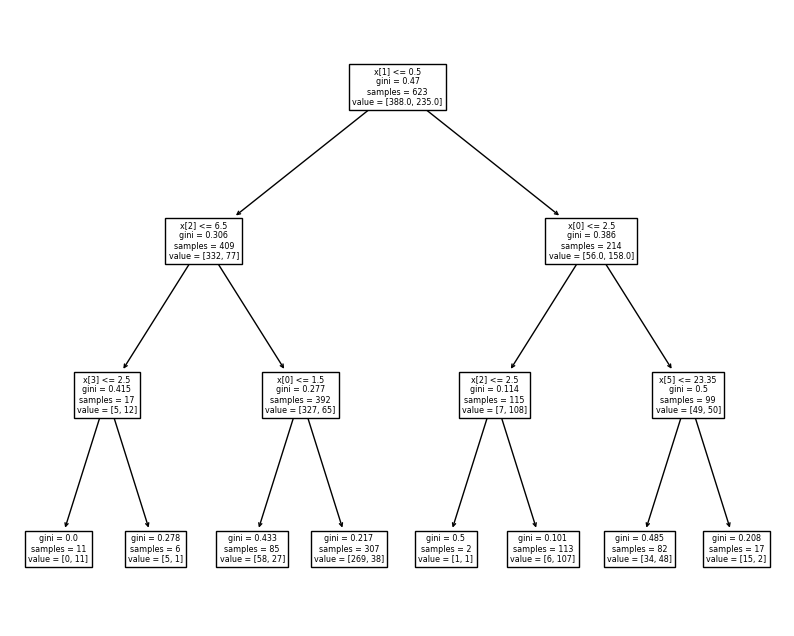

In [70]:
# Visualize decision-trees

plt.figure(figsize=(10,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 
plt.show()

In [71]:
# Decision Tree Classifier with criterion entropy

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

print("Training set score: {:.2f}".format(clf_en.score(X_train, y_train)))
print("Test set score: {:.2f}".format(clf_en.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_en)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_en))
print("Classification_Report: \n",classification_report(y_test,y_pred_en))

Training set score: 0.82
Test set score: 0.83
Accuracy Score: 0.83
Confusion Matrix: 
 [[144  17]
 [ 29  78]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       161
           1       0.82      0.73      0.77       107

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



In [72]:
# Gradient boosting machine

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

print("Training set score: {:.2f}".format(gbm.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gbm.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_gbm)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_gbm))
print("Classification_Report: \n",classification_report(y_test,y_pred_gbm))

Training set score: 0.89
Test set score: 0.84
Accuracy Score: 0.84
Confusion Matrix: 
 [[147  14]
 [ 30  77]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       161
           1       0.85      0.72      0.78       107

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.82       268
weighted avg       0.84      0.84      0.83       268



In [74]:
# Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)
y_pred_LDA = LDA.predict(X_test)

print("Training set score: {:.2f}".format(LDA.score(X_train, y_train)))
print("Test set score: {:.2f}".format(LDA.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_LDA)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_LDA))
print("Classification_Report: \n",classification_report(y_test,y_pred_LDA))

Training set score: 0.79
Test set score: 0.80
Accuracy Score: 0.80
Confusion Matrix: 
 [[140  21]
 [ 32  75]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       161
           1       0.78      0.70      0.74       107

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [75]:
# Quadratic Discriminant Analysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)
y_pred_QDA = QDA.predict(X_test)

print("Training set score: {:.2f}".format(QDA.score(X_train, y_train)))
print("Test set score: {:.2f}".format(QDA.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_QDA)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_QDA))
print("Classification_Report: \n",classification_report(y_test,y_pred_QDA))

Training set score: 0.80
Test set score: 0.82
Accuracy Score: 0.82
Confusion Matrix: 
 [[144  17]
 [ 32  75]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       161
           1       0.82      0.70      0.75       107

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268



In [76]:
# Gaussian Process Classifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
GPC = GaussianProcessClassifier()
GPC.fit(X_train,y_train)
y_pred_GPC = GPC.predict(X_test)

print("Training set score: {:.2f}".format(GPC.score(X_train, y_train)))
print("Test set score: {:.2f}".format(GPC.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_GPC)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_GPC))
print("Classification_Report: \n",classification_report(y_test,y_pred_GPC))

Training set score: 0.93
Test set score: 0.71
Accuracy Score: 0.71
Confusion Matrix: 
 [[132  29]
 [ 49  58]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.73      0.82      0.77       161
           1       0.67      0.54      0.60       107

    accuracy                           0.71       268
   macro avg       0.70      0.68      0.68       268
weighted avg       0.70      0.71      0.70       268

